# K-Nearest Neighbors (kNN)

## Import required packages

In [1]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as plt
from pathlib import Path
import pandas as pd

In [2]:
mower_df = pd.read_csv('RidingMowers.csv')
mower_df['Number'] = mower_df.index + 1
mower_df.head(9)

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5
5,110.1,19.2,Owner,6
6,108.0,17.6,Owner,7
7,82.8,22.4,Owner,8
8,69.0,20.0,Owner,9


In [3]:
mower_df.shape

(24, 4)

In [4]:
trainData, validData = train_test_split(mower_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)
newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}]) #esta es una nueva observación a predecir la clase
newHousehold

(14, 4) (10, 4)


,Income,Lot_Size
0,60,20


Scatter plot

   Income  Lot_Size Ownership  Number
5   110.1      19.2     Owner       6
3    61.5      20.8     Owner       4
7    82.8      22.4     Owner       8
2    64.8      21.6     Owner       3
4    87.0      23.6     Owner       5
0    60.0      18.4     Owner       1
1    85.5      16.8     Owner       2
6   108.0      17.6     Owner       7
    Income  Lot_Size Ownership  Number
20    47.4      16.4  Nonowner      21
18    59.4      16.0  Nonowner      19
13    52.8      20.8  Nonowner      14
22    51.0      14.0  Nonowner      23
16    84.0      17.6  Nonowner      17
21    33.0      18.8  Nonowner      22

6 (112.1, 19.2)
4 (63.5, 20.8)
8 (84.8, 22.4)
21 (49.4, 16.4)
19 (61.4, 16.0)
3 (66.8, 21.6)
5 (89.0, 23.6)
1 (62.0, 18.4)
14 (54.8, 20.8)
23 (53.0, 14.0)
2 (87.5, 16.8)
17 (86.0, 17.6)
7 (110.0, 17.6)
22 (35.0, 18.8)


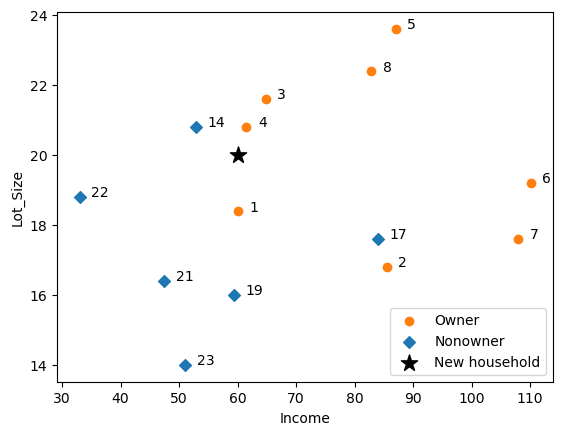

In [5]:
# vamos a plotear el traning data
fig, ax = plt.subplots()

subset = trainData.loc[trainData['Ownership']=='Owner']
print(subset) #todas las observaciones que son Owner
ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner', color='C1')

subset = trainData.loc[trainData['Ownership']=='Nonowner']
print(subset) #todas las observaciones que son Nonowner
print()
ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner', color='C0')

# plotear también la nueva observación
ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label

for _, row in trainData.iterrows(): # el signo _ toma el index de la observación, pero no lo vamos a usar
    print(row.Number, (row.Income + 2, row.Lot_Size))
    
for _, row in trainData.iterrows():
    ax.annotate(row.Number, (row.Income + 2, row.Lot_Size)) #se añade el Number de la observación en el plot
    
handles, labels = ax.get_legend_handles_labels() #handles serán los marcadores de datos o, D, s y 
                                                 #labels las etiquetas de la leyenda 
    
ax.legend(handles, labels, loc=4) #colocar leyenda en la 4ta esquina de la gráfica

plt.show()

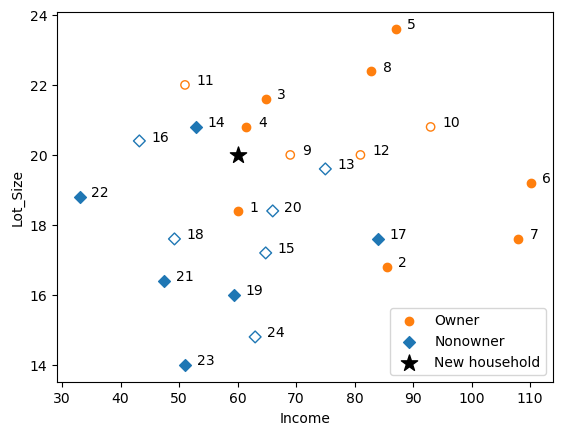

In [6]:
def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner' if showLabel else None, color='C1', **kwargs)

    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner' if showLabel else None, color='C0', **kwargs)

    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))

fig, ax = plt.subplots()

plotDataset(ax, trainData)
plotDataset(ax, validData, showLabel=False, facecolors='none')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, loc=4)


In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'Lot_Size']])  # Note the use of an array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income', 'Lot_Size']]), 
                                    columns=['zIncome', 'zLot_Size']),
                       mower_df[['Ownership', 'Number']]], axis=1)
print(mowerNorm.head())
print(mowerNorm.shape)

trainNorm = mowerNorm.iloc[trainData.index]
validNorm = mowerNorm.iloc[validData.index]
print('Training sample:')
print(trainNorm.iloc[:14, :])
#print(validNorm[0])

newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold), columns=['zIncome', 'zLot_Size'])
print('\nNueva obs:')
print(newHousehold)
print('Nueva obs escalada:')
print(newHouseholdNorm)

    zIncome  zLot_Size Ownership  Number
0 -0.477910  -0.174908     Owner       1
1  0.680365  -0.787085     Owner       2
2 -0.259882   1.049447     Owner       3
3 -0.409776   0.743358     Owner       4
4  0.748499   1.814668     Owner       5
(24, 4)
Training sample:
     zIncome  zLot_Size Ownership  Number
5   1.797760   0.131181     Owner       6
3  -0.409776   0.743358     Owner       4
7   0.557724   1.355535     Owner       8
20 -1.050235  -0.940129  Nonowner      21
18 -0.505164  -1.093174  Nonowner      19
2  -0.259882   1.049447     Owner       3
4   0.748499   1.814668     Owner       5
0  -0.477910  -0.174908     Owner       1
13 -0.804953   0.743358  Nonowner      14
22 -0.886713  -1.858395  Nonowner      23
1   0.680365  -0.787085     Owner       2
16  0.612231  -0.480996  Nonowner      17
6   1.702373  -0.480996     Owner       7
21 -1.704320  -0.021863  Nonowner      22

Nueva obs:
   Income  Lot_Size
0      60        20
Nueva obs escalada:
   zIncome  zLot_Size
0 -0.

In [8]:
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zIncome', 'zLot_Size']]) #ajuste del modelo
distances, indices = knn.kneighbors(newHouseholdNorm) #extracción de los vecinos más cercanos
print(distances, indices[0]) # indices is a list of lists, we are only interested in the first element
print(trainNorm.iloc[indices[0], :])

[[0.31358009 0.44793643 0.61217726]] [1 8 7]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


In [9]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

train_X = trainNorm[['zIncome', 'zLot_Size']]
train_y = trainNorm['Ownership']
valid_X = validNorm[['zIncome', 'zLot_Size']]
valid_y = validNorm['Ownership']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = k).fit(train_X, train_y)
    results.append({'k': k, 'accuracy': accuracy_score(valid_y, knn.predict(valid_X))})

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1       0.6
1    2       0.7
2    3       0.8
3    4       0.9
4    5       0.7
5    6       0.9
6    7       0.9
7    8       0.9
8    9       0.9
9   10       0.8
10  11       0.8
11  12       0.9
12  13       0.4
13  14       0.4


In [10]:
# Retrain with full dataset
mower_X = mowerNorm[['zIncome', 'zLot_Size']]
mower_y = mowerNorm['Ownership']
knn = KNeighborsClassifier(n_neighbors=4).fit(mower_X, mower_y)

distances, indices = knn.kneighbors(newHouseholdNorm) #extracción de los vecinos más cercanos
print(knn.predict(newHouseholdNorm))  #predicción de la clase 
print('Distances',distances)
print('Indices', indices)
print(mowerNorm.iloc[indices[0], :])

['Owner']
Distances [[0.31358009 0.40880312 0.44793643 0.61217726]]
Indices [[ 3  8 13  0]]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
8  -0.069107   0.437269     Owner       9
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


In [11]:
knn = KNeighborsClassifier(n_neighbors=7).fit(mower_X, mower_y)

distances, indices = knn.kneighbors(newHouseholdNorm) #extracción de los vecinos más cercanos
print(knn.predict(newHouseholdNorm))  #predicción de la clase 
print('Distances',distances)
print('Indices', indices)
print(mowerNorm.iloc[indices[0], :])

['Owner']
Distances [[0.31358009 0.40880312 0.44793643 0.61217726 0.6498441  0.67010189
  0.69831566]]
Indices [[ 3  8 13  0  2 19 12]]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
8  -0.069107   0.437269     Owner       9
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1
2  -0.259882   1.049447     Owner       3
19 -0.205375  -0.174908  Nonowner      20
12  0.203428   0.284225  Nonowner      13
